# Write a program for intensity transformation of an image using following transformations:

    * Image Negative and identity transformation
    * Log Transformation and Inverse Log Transformation
    * Power Law (use different values of gamma as shown in graph: refer notes)
    * nth root and nth power transformation

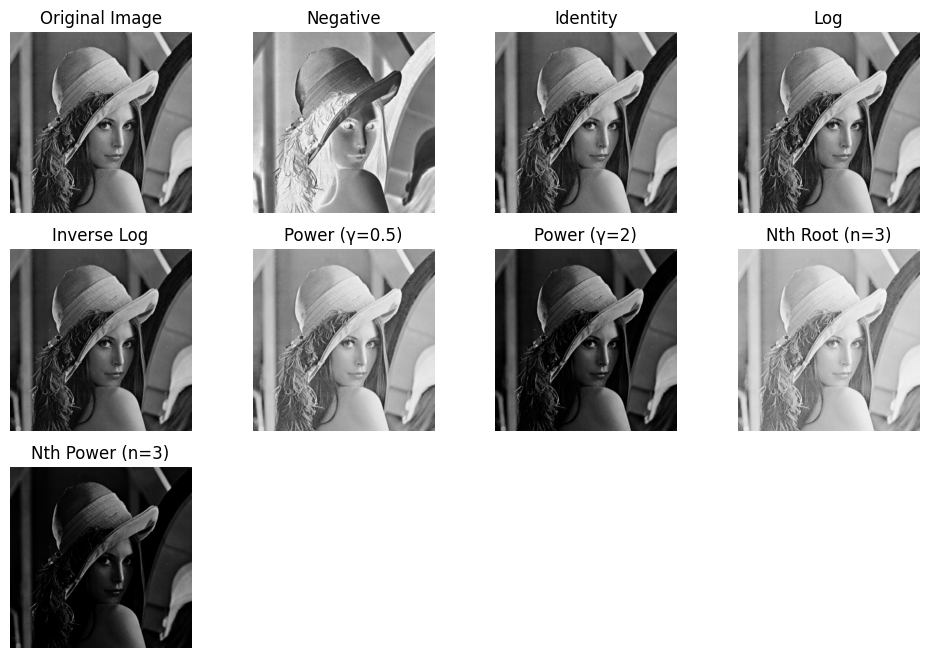

In [7]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def read_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to read image at {image_path}")
    img = img / 255.0  # Normalize [0,1]
    return img

def identity_transform(image):
    return image

def negative_transform(image):
    return 1.0 - image

def log_transform(image):
    return tf.math.log(1 + image)

def inverse_log_transform(image):
    return tf.math.exp(image) - 1

def power_law_transform(image, gamma):
    return tf.pow(image, gamma)

def nth_root_transform(image, n):
    return tf.pow(image, 1.0 / n)

def nth_power_transform(image, n):
    return tf.pow(image, n)

def plot_images(original, transformations, titles):
    num_images = len(transformations) + 1
    num_cols = 4
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(12, 8))
    plt.subplot(num_rows, num_cols, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    for i, (img, title) in enumerate(zip(transformations, titles), start=2):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis("off")

    plt.savefig(f"outimg_problem1.png")
    plt.show()

def main():
    img_path = "../test_imgs/lena.jpg"
    img = read_image(img_path)

    neg_img = negative_transform(img)
    id_img = identity_transform(img)
    log_img = log_transform(img)
    inv_log_img = inverse_log_transform(img)
    power_img_05 = power_law_transform(img, 0.5)
    power_img_2 = power_law_transform(img, 2.0)
    root_img = nth_root_transform(img, 3)
    power_img = nth_power_transform(img, 3)

    transformations = [neg_img, id_img, log_img, inv_log_img, power_img_05, power_img_2, root_img, power_img]
    titles = ["Negative", "Identity", "Log", "Inverse Log", "Power (γ=0.5)", "Power (γ=2)", "Nth Root (n=3)", "Nth Power (n=3)"]

    plot_images(img, transformations, titles)

if __name__ == "__main__":
    main()
